In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from matplotlib import style

In [2]:
style.use("seaborn")
pd.set_option("display.max_columns", None)
pd.set_option("max_rows", None)

In [3]:
X_train = pd.read_csv("Training_Data.csv", index_col = "date")

In [4]:
X_test = pd.read_csv("Testing_Data.csv", index_col = "date")

In [5]:
y = pd.read_csv("Target.csv",index_col = "date")

In [6]:
X_train.shape, X_test.shape, y.shape

((75, 94), (12, 94), (87, 1))

## FEATURE SELECTION 

**I will train a Model which learns 9 months later sales figure since we want to predict sales for 2020 and we only have sales figures for the first 3 months of 2020 ( January, February, March ) which means that in order to predict 2020 December we need to go back 9 months at least ( March ). This is the main reason we train our model in a way that it trained via looking 9 months later sales figures and predicts 9 months later sales figures.**

In [7]:
X_train.shape

(75, 94)

In [8]:
X_train.tail()

,TV_Pazar,google_tv,google_bzd,google_cm,google_dolar,google_euro,google_doviz,google_vestel,Enflasyon,güven_endeksi,euro,euro_degisim,dolar,dolar_degisim,perakende_endeks_elektrikli,perakende_endeks_elektrikli_mev_tak,day_tuk_egilim,eko_durum,eko_durum_beklenti,mali_durum,maddi_durum_beklenti,maddi_durum,daya_tuk_uygunluk,tasarruf_uygunluk,otomobil_alma,tuketici_fiyat_beklenti,tuketici_fiyat_dusunce,guven_endeks,issiz_beklenti,European Union_CC,Euro area_CC,Germany_CC,Spain_CC,France_CC,Italy_CC,United Kingdom_CC,Turkey_CC,European Union_RC,Euro area_RC,Germany_RC,Spain_RC,France_RC,Italy_RC,United Kingdom_RC,Turkey_RC,European Union_ES,Euro area_ES,Germany_ES,Spain_ES,France_ES,Italy_ES,United Kingdom_ES,Turkey_ES,pmi,gercek_yp_mevduat,reel_döviz,lag1,lag2,lag3,mean_son_3_ay,lag4,lag5,lag6,mean_son_6_ay,lag7,lag8,lag9,mean_son_9_ay,lag10,lag11,lag12,mean_son_12_ay,ay_2,ay_3,ay_4,ay_5,ay_6,ay_7,ay_8,ay_9,ay_10,ay_11,ay_12,ceyrek_2,ceyrek_3,ceyrek_4,mevsim_2,mevsim_3,mevsim_4,mevsim_2_2,mevsim_3_2,mevsim_3_3,otv_1,secim_1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-01,0.308081,0.833333,0.530864,0.973684,0.242424,0.206522,0.265957,0.826667,0.810570,0.109135,0.740898,0.000000,0.783940,0.000000,0.367816,0.084211,0.213423,0.087841,0.150879,0.000000,0.180505,0.200682,0.296323,0.127550,0.464135,0.360192,0.205157,0.117876,0.138363,0.826590,0.813559,0.752577,0.818942,0.409756,0.914027,0.583691,0.090196,0.786260,0.777372,0.735409,0.831099,0.722656,0.702213,0.263158,0.128631,0.819444,0.814433,0.780899,0.825095,0.681818,0.795181,0.510288,0.156740,0.153846,0.598567,0.257889,0.132198,0.100806,0.095301,0.035675,0.233906,0.244256,0.441012,0.185443,0.158455,0.217594,0.141689,0.200535,0.222421,0.551214,0.400998,0.263549,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
2018-12-01,0.354185,0.875000,0.395062,0.907895,0.171717,0.152174,0.180851,0.773333,0.741497,0.043436,0.727654,0.351055,0.769289,0.296860,0.613027,0.050000,0.173154,0.072208,0.112876,0.031732,0.080776,0.164298,0.319840,0.112037,0.000000,0.286331,0.156701,0.054554,0.062004,0.739884,0.723164,0.628866,0.754875,0.234146,0.936652,0.536481,0.082353,0.801527,0.781022,0.715953,0.831099,0.562500,0.756539,0.000000,0.360996,0.760417,0.745704,0.662921,0.695817,0.577922,0.765060,0.518519,0.206897,0.115385,0.652396,0.269770,0.308081,0.109850,0.000000,0.079038,0.095301,0.233906,0.244256,0.131606,0.382128,0.092606,0.217594,0.187718,0.141689,0.222421,0.551214,0.214074,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2019-01-01,0.025107,0.666667,0.296296,0.750000,0.202020,0.173913,0.223404,0.680000,0.744113,0.056579,0.746077,0.450965,0.783050,0.390349,0.000000,0.000000,0.303356,0.037221,0.126773,0.046238,0.162906,0.071063,0.388683,0.205975,0.066104,0.313669,0.136253,0.029226,0.060476,0.751445,0.740113,0.628866,0.763231,0.414634,0.923077,0.446352,0.027451,0.721374,0.711679,0.587549,0.737265,0.503906,0.762575,0.163743,0.236515,0.704861,0.694158,0.612360,0.707224,0.603896,0.722892,0.444444,0.125392,0.115385,0.749665,0.258473,0.354185,0.290262,0.010058,0.177984,0.000000,0.095301,0.233906,0.136054,0.164646,0.333781,0.092606,0.172845,0.217594,0.141689,0.222421,0.151917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-02-01,0.000000,0.770833,0.358025,0.815789,0.151515,0.130435,0.170213,0.706667,0.708530,0.030103,0.715162,0.293751,0.759701,0.267430,0.049808,0.042105,0.200000,0.000000,0.082813,0.199456,0.078069,0.017055,0.321123,0.190175,0.376934,0.288249,0.000000,0.009255,0.002443,0.786127,0.768362,0.649485,0.805014,0.521951,0.864253,0.467811,0.000000,0.744275,0.737226,0.680934,0.702413,0.554688,0.782696,0.283626,0.149378,0.704861,0.690722,0.606742,0.722433,0.574675,0.668675,0.267490,0.109718,0.284615,0.825993,0.288664,0.025107,0.337553,0.210695,0.132074,0.010058,0.000000,0.095301,0.055176,0.153205,0.099282,0.333781,0.107831,0.092606,0.217594,0.141689,0.072586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2019-03-01,0.179996,0.541667,0.419753,0.802632,0.30

In [9]:
y2 = y.shift(-9)

In [12]:
y.tail(12)

,TV_Pazar
date,
2019-04-01,349634.0
2019-05-01,392833.0
2019-06-01,381932.0
2019-07-01,346569.0
2019-08-01,328424.0
2019-09-01,371905.0
2019-10-01,463329.0
2019-11-01,546334.0
2019-12-01,504745.0


In [13]:
y2.tail(12)

,TV_Pazar
date,
2019-04-01,432595.0
2019-05-01,412781.0
2019-06-01,383645.0
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN
2019-10-01,NaN
2019-11-01,NaN
2019-12-01,NaN


In [14]:
y2 = np.log(y2)

In [15]:
y9_month_train = y2[:-12]

In [16]:
y9_month_train.shape, X_train.shape

((75, 1), (75, 94))

In [17]:
y9_month_train.head()

,TV_Pazar
date,
2013-01-01,13.243418
2013-02-01,13.146506
2013-03-01,13.255283
2013-04-01,13.284077
2013-05-01,12.979368


In [18]:
y9_month_train.tail()

,TV_Pazar
date,
2018-11-01,12.702061
2018-12-01,12.826394
2019-01-01,13.046193
2019-02-01,13.210986
2019-03-01,13.131809


## USING LASSO FOR FEATURE SELECTION WITH SELECTFROMMODEL 

**We will do the model fitting and feature selection alltogether in a few lines of code. First, we specify the Lasso Regression model, and we select a suitable alpha (equivalent of penalty).The bigger the alpha the less features that will be selected.Then we use the SelectFromModel object from sklearn, which will select automatically the features which coefficients are non-zero.
Remember to set the seed, the random state in this function**

In [19]:
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]

In [20]:
for i in alphas :
    lasso = Lasso(alpha = i, random_state = 48, max_iter = 5000)
    selector = SelectFromModel(lasso)
    selector.fit(X_train, y9_month_train)
    mask = selector.get_support()
    print("When alpha = {}, {} features are selected.".format(i, sum(mask)))
    print("Features are :")
    print(X_train.columns[mask])

When alpha = 10, 0 features are selected.
Features are :
Index([], dtype='object')
When alpha = 1, 0 features are selected.
Features are :
Index([], dtype='object')
When alpha = 0.1, 0 features are selected.
Features are :
Index([], dtype='object')
When alpha = 0.01, 7 features are selected.
Features are :
Index(['google_cm', 'google_vestel', 'euro', 'lag3', 'ceyrek_2', 'ceyrek_4',
       'mevsim_2_2'],
      dtype='object')
When alpha = 0.001, 29 features are selected.
Features are :
Index(['TV_Pazar', 'google_cm', 'google_vestel', 'euro', 'day_tuk_egilim',
       'mali_durum', 'daya_tuk_uygunluk', 'issiz_beklenti', 'Italy_CC',
       'Spain_RC', 'Italy_RC', 'United Kingdom_RC', 'Germany_ES',
       'United Kingdom_ES', 'lag1', 'lag4', 'lag5', 'lag7', 'lag10', 'lag12',
       'ay_3', 'ay_4', 'ay_5', 'ay_7', 'ay_8', 'ay_11', 'ceyrek_4', 'mevsim_4',
       'mevsim_2_2'],
      dtype='object')
When alpha = 0.0001, 60 features are selected.
Features are :
Index(['TV_Pazar', 'google_bzd', 

In [21]:
X_train.head()

,TV_Pazar,google_tv,google_bzd,google_cm,google_dolar,google_euro,google_doviz,google_vestel,Enflasyon,güven_endeksi,euro,euro_degisim,dolar,dolar_degisim,perakende_endeks_elektrikli,perakende_endeks_elektrikli_mev_tak,day_tuk_egilim,eko_durum,eko_durum_beklenti,mali_durum,maddi_durum_beklenti,maddi_durum,daya_tuk_uygunluk,tasarruf_uygunluk,otomobil_alma,tuketici_fiyat_beklenti,tuketici_fiyat_dusunce,guven_endeks,issiz_beklenti,European Union_CC,Euro area_CC,Germany_CC,Spain_CC,France_CC,Italy_CC,United Kingdom_CC,Turkey_CC,European Union_RC,Euro area_RC,Germany_RC,Spain_RC,France_RC,Italy_RC,United Kingdom_RC,Turkey_RC,European Union_ES,Euro area_ES,Germany_ES,Spain_ES,France_ES,Italy_ES,United Kingdom_ES,Turkey_ES,pmi,gercek_yp_mevduat,reel_döviz,lag1,lag2,lag3,mean_son_3_ay,lag4,lag5,lag6,mean_son_6_ay,lag7,lag8,lag9,mean_son_9_ay,lag10,lag11,lag12,mean_son_12_ay,ay_2,ay_3,ay_4,ay_5,ay_6,ay_7,ay_8,ay_9,ay_10,ay_11,ay_12,ceyrek_2,ceyrek_3,ceyrek_4,mevsim_2,mevsim_3,mevsim_4,mevsim_2_2,mevsim_3_2,mevsim_3_3,otv_1,secim_1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.637670,0.145833,0.000000,0.026316,0.0,0.00000,0.000000,0.000000,0.061748,0.873150,0.002535,0.406322,0.000000,0.312358,0.108557,0.284211,0.026846,0.708933,0.719512,0.638259,0.826715,0.748152,0.932298,0.780810,0.383966,0.694484,0.962658,0.866050,0.980452,0.000000,0.000000,0.000000,0.000000,0.151220,0.040724,0.068670,0.862745,0.133588,0.142336,0.354086,0.000000,0.289062,0.024145,0.549708,0.829876,0.034722,0.044674,0.095506,0.000000,0.113636,0.024096,0.065844,0.808777,0.446154,0.196205,0.990456,0.714968,0.674938,0.724735,0.761991,0.389213,0.277771,0.303280,0.649149,0.272216,0.341686,0.154291,0.608575,0.208179,0.144035,0.228442,0.557460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013-02-01,0.415874,0.187500,0.012346,0.118421,0.0,0.01087,0.010638,0.106667,0.047096,0.914330,0.007327,0.432037,0.000796,0.353231,0.126437,0.297368,0.163758,0.731762,0.766024,0.659112,0.783394,0.836271,0.990308,0.716174,0.270042,0.890168,0.986441,0.923039,1.000000,0.011561,0.005650,0.092784,0.008357,0.165854,0.009050,0.000000,0.823529,0.129771,0.124088,0.319066,0.099196,0.261719,0.024145,0.435673,0.950207,0.062500,0.061856,0.129213,0.076046,0.120130,0.003012,0.008230,0.893417,0.446154,0.181306,0.978574,0.637670,0.707627,0.638496,0.710108,0.724735,0.389213,0.277771,0.715391,0.229887,0.215269,0.341686,0.663491,0.154291,0.208179,0.144035,0.597846,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013-03-01,0.415957,0.125000,0.037037,0.078947,0.0,0.00000,0.010638,0.040000,0.060701,0.831830,0.001826,0.348114,0.008269,0.417962,0.310345,0.313158,0.347651,0.723821,0.737663,0.600181,0.780235,0.740762,0.994014,0.849756,0.483826,0.793765,0.983330,0.839260,0.826512,0.028902,0.016949,0.134021,0.052925,0.117073,0.000000,0.077253,0.843137,0.076336,0.069343,0.206226,0.091153,0.214844,0.000000,0.143275,1.000000,0.062500,0.061856,0.157303,0.019011,0.100649,0.090361,0.074074,0.996865,0.446154,0.121846,0.980912,0.415874,0.628339,0.674850,0.595549,0.638496,0.724735,0.389213,0.728457,0.201692,0.169628,0.215269,0.642360,0.341686,0.154291,0.208179,0.606797,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2013-04-01,0.377418,0.229167,0.061728,0.065789,0.0,0.00000,0.021277,0.026667,0.000000,0.865280,0.000000,0.378185,0.005932,0.322497,0.355045,0.310526,0.123490,0.824318,0.828985,0.631006,0.794675,0.582149,0.952965,0.862396,0.403657,0.809113,0.981996,0.858256,0.869884,0.063584,0.056497,0.061856,0.058496,0.121951,0.199095,0.094421,0.960784,0.000000,0.000000,0.000000,0.179625,0.035156,0.028169,0.192982,0.892116,0.000000,0.000000,0.000000,0.045627,0.000000,0.000000,0.000000,0.959248,0.446154,0.179338,1.000000,0.415957,0.400831,0.586673,0.467367,0.674850,0.638496,0.724735,0.715494,0.324873,0.139226,0.169628,0.640913,0.215269,0.341686,0.154291,0.606474,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
2013-05-01,0.361409,0.104167,0.135802,0.092105,0.0,0.00000,0.010638,0.08000

In [22]:
correlations = X_train.corr()["TV_Pazar"]

In [23]:
correlations_abs = np.abs(correlations)

In [24]:
high_corr = correlations_abs[correlations_abs > correlations_abs.median()]

In [25]:
len(high_corr)

47

In [26]:
high_corr

TV_Pazar                               1.000000
google_bzd                             0.406179
google_cm                              0.445305
google_dolar                           0.416894
google_euro                            0.351026
google_doviz                           0.430797
google_vestel                          0.248760
Enflasyon                              0.565198
güven_endeksi                          0.209649
euro                                   0.541568
dolar                                  0.509310
perakende_endeks_elektrikli            0.469944
perakende_endeks_elektrikli_mev_tak    0.260204
eko_durum                              0.372245
eko_durum_beklenti                     0.235443
mali_durum                             0.316681
maddi_durum_beklenti                   0.372742
maddi_durum                            0.516743
daya_tuk_uygunluk                      0.309990
tuketici_fiyat_dusunce                 0.452167
guven_endeks                           0

**Okay, I decided to take features that are either in the features that selected from the Lasso regression when alpha = 0.0001
or have higher correlation value than the other features.( higher than the median ) I will combine these two feature sets and exclude features that does 
not exist even in one of them. By doing so, I used 2 different feature selection technique and also naive approach which will
return most of the features in my dataset. If I would like to be more strict about feature selection process I would go for
higher alpha values which means higher penalties ( returns lesser features as selected ) or I would search for higher correlation
values when deciding which features to pick up. This is a general approach when selecting features in our dataset.**

In [27]:
lasso = Lasso(alpha = 0.0001, random_state = 48, max_iter = 5000)
selector = SelectFromModel(lasso)
selector.fit(X_train, y9_month_train)
mask = selector.get_support()

In [28]:
features_selected_from_lasso = X_train.columns[mask].tolist()

In [29]:
len(features_selected_from_lasso)

60

In [30]:
len(high_corr)

47

In [31]:
features_highly_correlated_with_sales = high_corr.index.tolist()

In [32]:
features = list(set().union(features_selected_from_lasso, features_highly_correlated_with_sales))

In [33]:
len(features)

74

In [34]:
X_train.shape

(75, 94)

**As I said, we will select 74 features and drop 20 columns. The reason I choose a naive approach is the fact that number of
observations in my dataset is already small which means I have a pretty small dataset. If I would have a dataset which have
ten thousands of observations I may concern with curse of dimensionality which significantly affect the models performances 
so I need to select features more strictly. However, this is not the case for my dataset here. I want to use as much as
features possible in order to increase models prediction capabilities.**

In [35]:
features

['ay_12',
 'lag12',
 'Germany_CC',
 'France_RC',
 'Italy_ES',
 'lag6',
 'lag5',
 'mevsim_3',
 'mean_son_3_ay',
 'maddi_durum_beklenti',
 'ceyrek_4',
 'tuketici_fiyat_beklenti',
 'Spain_RC',
 'day_tuk_egilim',
 'mevsim_3_3',
 'mevsim_4',
 'mali_durum',
 'guven_endeks',
 'google_vestel',
 'daya_tuk_uygunluk',
 'Italy_CC',
 'Enflasyon',
 'United Kingdom_RC',
 'mean_son_6_ay',
 'ay_2',
 'google_cm',
 'TV_Pazar',
 'google_bzd',
 'google_doviz',
 'lag2',
 'euro_degisim',
 'dolar_degisim',
 'France_CC',
 'lag7',
 'dolar',
 'issiz_beklenti',
 'ay_4',
 'reel_döviz',
 'Spain_ES',
 'Spain_CC',
 'mevsim_2',
 'pmi',
 'maddi_durum',
 'mean_son_12_ay',
 'tasarruf_uygunluk',
 'tuketici_fiyat_dusunce',
 'otv_1',
 'google_euro',
 'eko_durum',
 'France_ES',
 'ay_7',
 'United Kingdom_CC',
 'lag1',
 'gercek_yp_mevduat',
 'euro',
 'lag9',
 'lag3',
 'google_dolar',
 'mevsim_2_2',
 'secim_1',
 'güven_endeksi',
 'lag4',
 'mean_son_9_ay',
 'United Kingdom_ES',
 'perakende_endeks_elektrikli_mev_tak',
 'lag11',
 

In [36]:
X_train[features].to_csv("X_train.csv")
X_test[features].to_csv("X_test.csv")

## MODELLING 

In [37]:
X_train = pd.read_csv("X_train.csv", index_col = "date")

In [38]:
X_train.head()

,ay_12,lag12,Germany_CC,France_RC,Italy_ES,lag6,lag5,mevsim_3,mean_son_3_ay,maddi_durum_beklenti,ceyrek_4,tuketici_fiyat_beklenti,Spain_RC,day_tuk_egilim,mevsim_3_3,mevsim_4,mali_durum,guven_endeks,google_vestel,daya_tuk_uygunluk,Italy_CC,Enflasyon,United Kingdom_RC,mean_son_6_ay,ay_2,google_cm,TV_Pazar,google_bzd,google_doviz,lag2,euro_degisim,dolar_degisim,France_CC,lag7,dolar,issiz_beklenti,ay_4,reel_döviz,Spain_ES,Spain_CC,mevsim_2,pmi,maddi_durum,mean_son_12_ay,tasarruf_uygunluk,tuketici_fiyat_dusunce,otv_1,google_euro,eko_durum,France_ES,ay_7,United Kingdom_CC,lag1,gercek_yp_mevduat,euro,lag9,lag3,google_dolar,mevsim_2_2,secim_1,güven_endeksi,lag4,mean_son_9_ay,United Kingdom_ES,perakende_endeks_elektrikli_mev_tak,lag11,ay_10,Turkey_ES,Turkey_CC,Turkey_RC,perakende_endeks_elektrikli,lag10,Germany_RC,eko_durum_beklenti
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0.228442,0.000000,0.289062,0.024096,0.303280,0.277771,0,0.761991,0.826715,0,0.694484,0.000000,0.026846,0,0,0.638259,0.866050,0.000000,0.932298,0.040724,0.061748,0.549708,0.649149,0,0.026316,0.637670,0.000000,0.000000,0.674938,0.406322,0.312358,0.151220,0.272216,0.000000,0.980452,0,0.990456,0.000000,0.000000,0,0.446154,0.748152,0.557460,0.780810,0.962658,0,0.00000,0.708933,0.113636,0,0.068670,0.714968,0.196205,0.002535,0.154291,0.724735,0.0,0,0,0.873150,0.389213,0.608575,0.065844,0.284211,0.144035,0,0.808777,0.862745,0.829876,0.108557,0.208179,0.354086,0.719512
2013-02-01,0,0.144035,0.092784,0.261719,0.003012,0.277771,0.389213,0,0.710108,0.783394,0,0.890168,0.099196,0.163758,0,0,0.659112,0.923039,0.106667,0.990308,0.009050,0.047096,0.435673,0.715391,1,0.118421,0.415874,0.012346,0.010638,0.707627,0.432037,0.353231,0.165854,0.229887,0.000796,1.000000,0,0.978574,0.076046,0.008357,0,0.446154,0.836271,0.597846,0.716174,0.986441,0,0.01087,0.731762,0.120130,0,0.000000,0.637670,0.181306,0.007327,0.341686,0.638496,0.0,0,0,0.914330,0.724735,0.663491,0.008230,0.297368,0.208179,0,0.893417,0.823529,0.950207,0.126437,0.154291,0.319066,0.766024
2013-03-01,0,0.208179,0.134021,0.214844,0.090361,0.389213,0.724735,0,0.595549,0.780235,0,0.793765,0.091153,0.347651,0,0,0.600181,0.839260,0.040000,0.994014,0.000000,0.060701,0.143275,0.728457,0,0.078947,0.415957,0.037037,0.010638,0.628339,0.348114,0.417962,0.117073,0.201692,0.008269,0.826512,0,0.980912,0.019011,0.052925,1,0.446154,0.740762,0.606797,0.849756,0.983330,0,0.00000,0.723821,0.100649,0,0.077253,0.415874,0.121846,0.001826,0.215269,0.674850,0.0,0,0,0.831830,0.638496,0.642360,0.074074,0.313158,0.154291,0,0.996865,0.843137,1.000000,0.310345,0.341686,0.206226,0.737663
2013-04-01,0,0.154291,0.061856,0.035156,0.000000,0.724735,0.638496,0,0.467367,0.794675,0,0.809113,0.179625,0.123490,0,0,0.631006,0.858256,0.026667,0.952965,0.199095,0.000000,0.192982,0.715494,0,0.065789,0.377418,0.061728,0.021277,0.400831,0.378185,0.322497,0.121951,0.324873,0.005932,0.869884,1,1.000000,0.045627,0.058496,1,0.446154,0.582149,0.606474,0.862396,0.981996,0,0.00000,0.824318,0.000000,0,0.094421,0.415957,0.179338,0.000000,0.169628,0.586673,0.0,1,0,0.865280,0.674850,0.640913,0.000000,0.310526,0.341686,0,0.959248,0.960784,0.892116,0.355045,0.215269,0.000000,0.828985
2013-05-01,0,0.341686,0.206186,0.000000,0.033133,0.638496,0.674850,0,0.355799,0.944495,0,0.844604,0.048257,0.613423,0,0,0.607434,0.953239,0.080000,0.967930,0.203620,0.019885,0.225146,0.613828,0,0.092105,0.361409,0.135802,0.010638,0.400916,0.442870,0.400478,0.000000,0.695738,0.011655,0.810324,0,0.968835,0.076046,0.041783,1,0.446154,0.718590,0.606367,0.978167,0.985775,0,0.00000,0.909926,0.000000,0,0.137339,0.377418,0.090325,0.006113,0.139226,0.333660,0.0,1,0,0.952159,0.586673,0.638413,0.078189,0.323684,0.215269,0,0.868339,0.811765,0.825726,0.484036,0.169628,0.307393,0.927396


In [39]:
X_test = pd.read_csv("X_test.csv", index_col = "date")

In [40]:
X_test.head()

,ay_12,lag12,Germany_CC,France_RC,Italy_ES,lag6,lag5,mevsim_3,mean_son_3_ay,maddi_durum_beklenti,ceyrek_4,tuketici_fiyat_beklenti,Spain_RC,day_tuk_egilim,mevsim_3_3,mevsim_4,mali_durum,guven_endeks,google_vestel,daya_tuk_uygunluk,Italy_CC,Enflasyon,United Kingdom_RC,mean_son_6_ay,ay_2,google_cm,TV_Pazar,google_bzd,google_doviz,lag2,euro_degisim,dolar_degisim,France_CC,lag7,dolar,issiz_beklenti,ay_4,reel_döviz,Spain_ES,Spain_CC,mevsim_2,pmi,maddi_durum,mean_son_12_ay,tasarruf_uygunluk,tuketici_fiyat_dusunce,otv_1,google_euro,eko_durum,France_ES,ay_7,United Kingdom_CC,lag1,gercek_yp_mevduat,euro,lag9,lag3,google_dolar,mevsim_2_2,secim_1,güven_endeksi,lag4,mean_son_9_ay,United Kingdom_ES,perakende_endeks_elektrikli_mev_tak,lag11,ay_10,Turkey_ES,Turkey_CC,Turkey_RC,perakende_endeks_elektrikli,lag10,Germany_RC,eko_durum_beklenti
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0,0.092606,0.597938,0.750000,0.635542,0.010058,0.210695,0,-0.074671,0.394404,0,0.453237,0.697051,0.322148,0,0,0.563010,0.289333,0.533333,0.319698,0.791855,0.699634,0.368421,0.015099,0,0.657895,0.043288,0.358025,0.372340,-0.025753,0.562851,0.541001,0.546341,-0.105340,0.862736,0.139890,1,0.199065,0.714829,0.785515,1,0.315385,0.144969,-0.048136,0.352198,-0.061347,1,0.250000,-0.042928,0.561688,0,0.454936,0.179996,0.974193,0.807992,0.086946,-0.112107,0.373737,1,0,0.338329,0.263288,-0.033306,0.267490,0.028947,0.333781,0,0.253918,0.090196,0.174274,0.242656,0.099282,0.677043,0.294385
2019-05-01,0,0.333781,0.525773,0.664062,0.692771,0.210695,0.263288,0,-0.066877,0.020307,0,0.236451,0.686327,-0.041611,0,0,0.030825,-0.113005,0.586667,0.167474,0.850679,0.658294,0.307018,-0.008609,0,0.710526,0.158878,0.592593,0.329787,0.158878,0.571714,0.543392,0.624390,-0.094223,0.930963,-0.079108,0,0.144721,0.760456,0.852368,1,0.200000,-0.061967,-0.105090,0.065211,-0.077351,1,0.271739,-0.112655,0.717532,0,0.575107,0.043288,1.063561,0.870829,-0.078248,-0.140748,0.373737,1,1,-0.083784,-0.112107,-0.093594,0.074074,0.015789,0.099282,0,0.087774,-0.121569,0.145228,0.334610,0.086946,0.762646,-0.053602
2019-06-01,0,0.099282,0.350515,0.652344,0.641566,0.263288,-0.112107,1,0.001232,0.216155,0,0.395204,0.713137,0.344966,1,0,0.009066,0.001461,0.760000,0.177024,0.764706,0.501832,0.000000,-0.048395,0,0.934211,0.129710,1.037037,0.223404,0.018650,0.271998,0.189253,0.634146,0.127550,0.879300,-0.078803,0,0.191079,0.711027,0.896936,0,0.400000,-0.038658,-0.174212,0.160586,-0.094243,1,0.271739,-0.103970,0.688312,0,0.480687,0.158878,1.156647,0.829484,-0.191830,0.064582,0.282828,1,1,0.021690,-0.140748,-0.103753,0.090535,0.305263,0.086946,0,0.250784,-0.039216,0.327801,0.329502,-0.078248,0.809339,0.053885
2019-07-01,0,0.086946,0.371134,0.632812,0.692771,-0.112107,-0.140748,1,-0.020324,0.156588,0,0.388969,0.624665,0.283221,1,0,-0.114234,-0.054067,0.733333,0.174173,0.864253,0.550497,-0.122807,-0.108250,0,0.855263,0.035087,0.876543,0.276596,0.137217,0.281853,0.251245,0.731707,0.185683,0.848904,-0.100794,0,0.243475,0.768061,0.818942,0,0.307692,-0.243889,-0.215116,0.222063,-0.024894,0,0.304348,-0.115385,0.672078,1,0.635193,0.129710,1.197518,0.792588,-0.179843,-0.091366,0.303030,1,0,-0.026295,0.064582,-0.102419,0.061728,0.013158,-0.078248,0,0.137931,-0.086275,0.174274,0.315453,-0.191830,0.661479,0.037720
2019-08-01,0,-0.078248,0.268041,0.613281,0.659639,-0.140748,0.064582,1,-0.023841,0.194495,0,0.356835,0.707775,0.014765,1,0,0.087035,0.031661,0.733333,0.152223,0.814480,0.464678,-0.628655,-0.105587,0,0.881579,-0.013464,1.037037,0.265957,0.107297,0.324919,0.313158,0.712195,-0.229256,0.838593,-0.018632,0,0.281067,0.863118,0.782730,0,0.407692,-0.029562,-0.272867,0.263717,0.015559,0,0.336957,-0.068734,0.681818,0,0.442060,0.035087,1.214959,0.770362,0.059283,0.040493,0.292929,1,0,0.057480,-0.091366,-0.122949,-0.008230,0.005263,-0.191830,0,0.319749,-0.082353,0.402490,0.222222,-0.179843,0.739300,0.063244


In [41]:
X_train.shape, X_test.shape, y.shape

((75, 74), (12, 74), (87, 1))

In [42]:
y9_month_train.shape

(75, 1)

In [43]:
X_train.tail(3)

,ay_12,lag12,Germany_CC,France_RC,Italy_ES,lag6,lag5,mevsim_3,mean_son_3_ay,maddi_durum_beklenti,ceyrek_4,tuketici_fiyat_beklenti,Spain_RC,day_tuk_egilim,mevsim_3_3,mevsim_4,mali_durum,guven_endeks,google_vestel,daya_tuk_uygunluk,Italy_CC,Enflasyon,United Kingdom_RC,mean_son_6_ay,ay_2,google_cm,TV_Pazar,google_bzd,google_doviz,lag2,euro_degisim,dolar_degisim,France_CC,lag7,dolar,issiz_beklenti,ay_4,reel_döviz,Spain_ES,Spain_CC,mevsim_2,pmi,maddi_durum,mean_son_12_ay,tasarruf_uygunluk,tuketici_fiyat_dusunce,otv_1,google_euro,eko_durum,France_ES,ay_7,United Kingdom_CC,lag1,gercek_yp_mevduat,euro,lag9,lag3,google_dolar,mevsim_2_2,secim_1,güven_endeksi,lag4,mean_son_9_ay,United Kingdom_ES,perakende_endeks_elektrikli_mev_tak,lag11,ay_10,Turkey_ES,Turkey_CC,Turkey_RC,perakende_endeks_elektrikli,lag10,Germany_RC,eko_durum_beklenti
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,0.222421,0.628866,0.503906,0.722892,0.233906,0.095301,0,0.177984,0.162906,0,0.313669,0.737265,0.303356,0,0,0.046238,0.029226,0.680000,0.388683,0.923077,0.744113,0.163743,0.136054,0,0.750000,0.025107,0.296296,0.223404,0.290262,0.450965,0.390349,0.414634,0.164646,0.783050,0.060476,0,0.258473,0.707224,0.763231,0,0.115385,0.071063,0.151917,0.205975,0.136253,1,0.173913,0.037221,0.603896,0,0.446352,0.354185,0.749665,0.746077,0.092606,0.010058,0.202020,0,0,0.056579,0.000000,0.172845,0.444444,0.000000,0.141689,0,0.125392,0.027451,0.236515,0.000000,0.217594,0.587549,0.126773
2019-02-01,0,0.141689,0.649485,0.554688,0.668675,0.095301,0.000000,0,0.132074,0.078069,0,0.288249,0.702413,0.200000,0,0,0.199456,0.009255,0.706667,0.321123,0.864253,0.708530,0.283626,0.055176,1,0.815789,0.000000,0.358025,0.170213,0.337553,0.293751,0.267430,0.521951,0.153205,0.759701,0.002443,0,0.288664,0.722433,0.805014,0,0.284615,0.017055,0.072586,0.190175,0.000000,1,0.130435,0.000000,0.574675,0,0.467811,0.025107,0.825993,0.715162,0.333781,0.210695,0.151515,0,1,0.030103,0.010058,0.107831,0.267490,0.042105,0.217594,0,0.109718,0.000000,0.149378,0.049808,0.092606,0.680934,0.082813
2019-03-01,0,0.217594,0.659794,0.628906,0.665663,0.000000,0.010058,0,0.000000,0.214801,0,0.597602,0.812332,0.464430,0,0,0.083409,0.090112,0.666667,0.342218,0.805430,0.710623,0.233918,0.000000,0,0.802632,0.179996,0.419753,0.319149,0.000000,0.505393,0.471596,0.560976,0.000000,0.798827,0.000000,0,0.249318,0.821293,0.899721,1,0.346154,0.000000,0.000000,0.216604,0.027562,1,0.228261,0.045161,0.610390,0,0.429185,0.000000,1.000000,0.751096,0.099282,0.263288,0.303030,0,1,0.103859,0.210695,0.000000,0.329218,0.136842,0.092606,0,0.163009,0.047059,0.136929,0.265645,0.333781,0.801556,0.187465


In [44]:
y9_month_train.tail(3)

,TV_Pazar
date,
2019-01-01,13.046193
2019-02-01,13.210986
2019-03-01,13.131809


In [45]:
y9_month_train = np.array(y9_month_train).ravel()

In [46]:
y9_month_train.shape

(75,)

### PICKING THE MODEL 

**Here, I will try different regression models which are recommended by scikit-learn. For a dataset like this, Lasso regression,
ElasticNet regression and RidgeRegression are recommended. I will also try some other regression models that are available
in the scikit-learn API. I will use TimeSeriesSptlit strategy in order to use cross-validation in time-series data. I will 
evaluate my models performances using cross_val_score and take the mean of the error which is mean_squared_error for regression
problems Lets see which model will outperform others and have lesser error.**

In [47]:
lasso = Lasso(random_state = 48, max_iter = 5000)
elastic = ElasticNet(random_state = 43, max_iter = 5000)
svr = LinearSVR(random_state = 33, max_iter = 5000)
ridge = Ridge(random_state = 22, max_iter = 5000)
gb = GradientBoostingRegressor(random_state = 66, criterion = "mse")
random_forest = RandomForestRegressor(random_state = 1)
sgd = SGDRegressor(random_state = 2)

In [48]:
models = {"lasso" : lasso, "elastic" : elastic, "svr" : svr, "ridge" : ridge,"gradient_boosting" : gb , 
          "random_forest" : random_forest, "sgd" : sgd}

In [49]:
def model_training(models):
    
    max_error = -np.inf
    min_error_models = []
    results = {}
    for modelname, model in models.items():
        print(modelname, "is in the training...")
        tscv = TimeSeriesSplit(n_splits=12, test_size = 3)
        scores = cross_val_score(model, X_train, y9_month_train, cv= tscv, scoring = "neg_mean_squared_error")
        print("Average mean error for the {} model is : {}".format(modelname, np.mean(scores)), "\n")
        results.update({modelname : np.mean(scores)})
        if np.mean(scores) > max_error:
            max_error = np.mean(scores)
            min_error_models.append(modelname)
    print("\n")
    print("WINNER is {} with mean squared error equals to {} :".format(str.upper(min_error_models[-1]), np.round(max_error,8)))
    return results

In [50]:
results = model_training(models)

lasso is in the training...
Average mean error for the lasso model is : -0.0504230289249889 

elastic is in the training...
Average mean error for the elastic model is : -0.0504230289249889 

svr is in the training...
Average mean error for the svr model is : -1.6750863048732014 

ridge is in the training...
Average mean error for the ridge model is : -0.021336388086711067 

gradient_boosting is in the training...
Average mean error for the gradient_boosting model is : -0.040173553907617295 

random_forest is in the training...
Average mean error for the random_forest model is : -0.031901790970380615 

sgd is in the training...
Average mean error for the sgd model is : -3.5250750310607426 



WINNER is RIDGE with mean squared error equals to -0.02133639 :


In [51]:
results

{'lasso': -0.0504230289249889,
 'elastic': -0.0504230289249889,
 'svr': -1.6750863048732014,
 'ridge': -0.021336388086711067,
 'gradient_boosting': -0.040173553907617295,
 'random_forest': -0.031901790970380615,
 'sgd': -3.5250750310607426}

In [52]:
r = pd.DataFrame.from_dict(results, orient = "index")

In [53]:
r = r.reset_index()

In [54]:
r.columns = ["modelname", "MSE"]

In [55]:
r

,modelname,MSE
0,lasso,-0.050423
1,elastic,-0.050423
2,svr,-1.675086
3,ridge,-0.021336
4,gradient_boosting,-0.040174
5,random_forest,-0.031902
6,sgd,-3.525075


<Figure size 1440x1440 with 0 Axes>

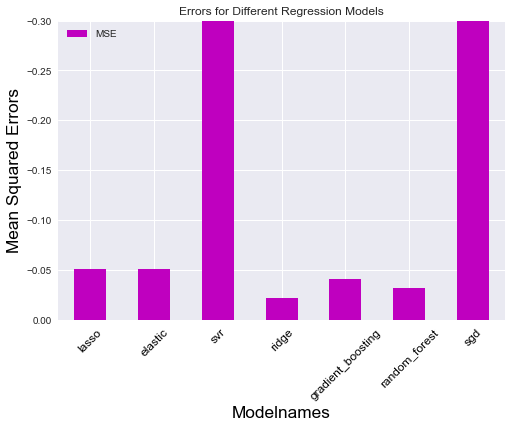

In [58]:
# plt.tight_layout()
plt.figure(figsize = (20,20))
r.plot(kind = "bar", color = "m")
plt.ylim(0,-0.3)
plt.xticks(range(0,len(r.index)), r.modelname, rotation = 45, color = "k", fontsize = "large")
plt.title("Errors for Different Regression Models")
plt.xlabel("Modelnames", color = "k", fontsize = "xx-large")
plt.ylabel("Mean Squared Errors", color = "k", fontsize = "xx-large")
plt.savefig("Model_Comparison.png")

### OPTIMIZING THE MODEL -- HYPERPARAMETER TUNING 

**Okay, we trained 7 different regression models and calculated their performances. Graph above shows that Ridge Regression 
give us the minimum error. I will continue with this model. When training models for selection, we did not specify any 
parameters. We just initialized them by default parameters. Here, I will do hyperparameter tuning for optimizing models 
performance. This step basically arranges models parameters in a way that it better fits the data which leads to better 
predictions. We dont forget to use cross validation in order to avoid overfitting.**

**We will use GridSearchCV method for tuning hyperparameters. We must be aware of the fact that if we increase the size of the grid, we increase the numerical operations. Thus, we need to consider model fitting time and then choose best possible 
parameter setup. Otherwise, we may encounter with time complexity problem which is not desired for any kind of machine learning project.**

**Lets see how can we improve models performance.**

**I will check the time required for model fitting the data. By checking this, I will decide the size of the grid.**

In [59]:
%timeit Ridge(random_state = 22).fit(X_train, y9_month_train)

2.89 ms ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Okay, it takes 2.9 ms per loop and total number of runs equal to 7 with each run having 100 loops which means that total 
number of loops equal to 700. Since each loop took approximately 3 ms. I will calculate model fitting time as follows :**
    
**3 * 700 = 2100 ms which equals to approximately 2 seconds.**
    
**Thus, I can be flexible while doing gridsearch operation. I can use a grid like 5 * 5 * 5 which equals 125 epochs.
Since each epoch will approximately take 2 seconds it means that the operation will take 250 seconds to complete which is 
roughly 4 minutes. Also dont forget to use cross-validation technique which also increases the number of epochs. If we use
5 fold cv for example it means that now we are adding another multiplier and our epochs now become 5*5*5*5 = 625.**

**In most cases, since GridSearchCV algorithm already optimized by scikit-learn developers it takes far 
lesser time than this calculation. Also, after process starts CPU allocated for this calculations also increases which results in far efficient computations and significant time reduction.Still, it is a good practice while starting optimization processes.**

In [60]:
ridge = Ridge(random_state = 22)

parameters = {"alpha" : [10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5],
               "max_iter" : [1000,5000,10000],
              "tol" : [10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5],
              }

tscv = TimeSeriesSplit(n_splits=12, test_size = 3)

grid_obj = GridSearchCV(ridge, parameters, cv= tscv, scoring='neg_mean_squared_error', verbose = 2, 
                        return_train_score=True, n_jobs = -1)

grid_obj.fit(X_train, y9_month_train)

results = pd.DataFrame.from_dict(grid_obj.cv_results_)


Fitting 12 folds for each of 363 candidates, totalling 4356 fits


In [61]:
results.shape

(363, 37)

In [62]:
best_ridge = grid_obj.best_estimator_

In [63]:
best_ridge

Ridge(alpha=0.01, max_iter=1000, random_state=22, tol=1e-05)

In [64]:
grid_obj.best_score_

-0.014769968359901431

**Lets recall the Ridge Regression model before optimization and compare it with the optimized one.**

In [65]:
r[r.modelname == "ridge"]

,modelname,MSE
3,ridge,-0.021336


In [66]:
ridge_models = {"Default_Model" : -0.021336, "Optimized_Model" : -0.014769}

In [67]:
df = pd.DataFrame(ridge_models, index = [0])

In [68]:
df

,Default_Model,Optimized_Model
0,-0.021336,-0.014769


In [69]:
df["Default_Model"].values

array([-0.021336])

In [70]:
pct_change = ( df.Optimized_Model - df.Default_Model ) /  df.Default_Model

In [71]:
pct_change = np.abs(pct_change).values.tolist()

In [72]:
pct_change = round(pct_change[0] * 100)

In [73]:
pct_change

31

(-0.5, 0.5)

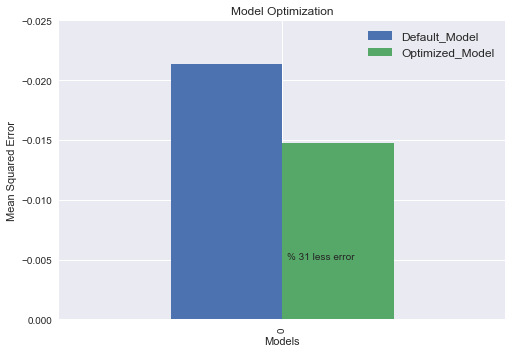

In [74]:
df.plot(kind = "bar")
plt.ylim(0,-0.025)
plt.title("Model Optimization")
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.legend(fontsize = "large")
plt.annotate(text = "% {} less error".format(pct_change), xy = (0.01,-0.005))
plt.xlim(-0.5, 0.5)

### PREDICTIONS ! IT IS ABOUT TIME.

In [75]:
best_ridge

Ridge(alpha=0.01, max_iter=1000, random_state=22, tol=1e-05)

In [76]:
preds = best_ridge.predict(X_test)

In [77]:
preds

array([13.0517566 , 12.85017751, 12.67509949, 12.65316382, 12.89572972,
       12.98954934, 12.61856408, 12.81290584, 12.99598171, 13.0615555 ,
       13.20760259, 13.11812028])

In [81]:
sales_predictions = np.exp(preds)

In [82]:
sales_predictions

array([465914.11730965, 380856.33583525, 319687.5825618 , 312751.37238941,
       398606.39190834, 437813.9550733 , 302115.32018798, 366922.46729576,
       440639.21155423, 470502.00491146, 544488.76655662, 497882.94420235])

In [83]:
dates = ["2020-01-01", "2020-02-01", "2020-03-01",
         "2020-04-01","2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01", 
         "2020-09-01", "2020-10-01", "2020-11-01", "2020-12-01"]

In [84]:
forecasts = pd.DataFrame(data = sales_predictions, index = dates, columns = ["TV_Pazar"])

In [85]:
forecasts

,TV_Pazar
2020-01-01,465914.117310
2020-02-01,380856.335835
2020-03-01,319687.582562
2020-04-01,312751.372389
2020-05-01,398606.391908
2020-06-01,437813.955073
2020-07-01,302115.320188
2020-08-01,366922.467296
2020-09-01,440639.211554
2020-10-01,470502.004911


In [86]:
forecasts.to_csv("Forecasts_Regression.csv")

In [87]:
y.tail()

,TV_Pazar
date,
2019-11-01,546334.0
2019-12-01,504745.0
2020-01-01,432595.0
2020-02-01,412781.0
2020-03-01,383645.0


In [88]:
sales_predictions_2020 = sales_predictions[3:]

In [89]:
len(sales_predictions_2020)

9

In [90]:
sales_predictions_2020

array([312751.37238941, 398606.39190834, 437813.9550733 , 302115.32018798,
       366922.46729576, 440639.21155423, 470502.00491146, 544488.76655662,
       497882.94420235])

In [92]:
dates = ["2020-04-01","2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01", 
         "2020-09-01", "2020-10-01", "2020-11-01", "2020-12-01"]

In [93]:
sales_predictions_2020

array([312751.37238941, 398606.39190834, 437813.9550733 , 302115.32018798,
       366922.46729576, 440639.21155423, 470502.00491146, 544488.76655662,
       497882.94420235])

In [94]:
sales_forecast = pd.DataFrame(data = sales_predictions_2020, index = dates, columns = ["TV_Pazar"])

In [95]:
sales_forecast

,TV_Pazar
2020-04-01,312751.372389
2020-05-01,398606.391908
2020-06-01,437813.955073
2020-07-01,302115.320188
2020-08-01,366922.467296
2020-09-01,440639.211554
2020-10-01,470502.004911
2020-11-01,544488.766557
2020-12-01,497882.944202


In [96]:
sales_2020 = y.append(sales_forecast)

Text(0, 0.5, 'Sales Figures')

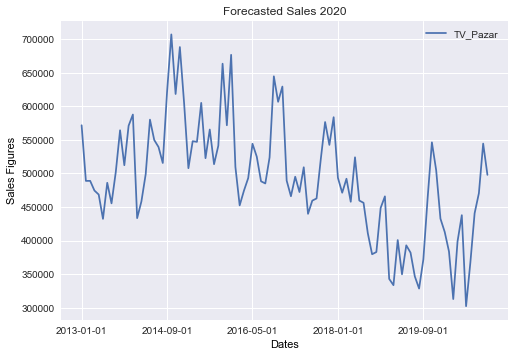

In [97]:
sales_2020.plot.line()
plt.title("Forecasted Sales 2020")
plt.xlabel("Dates", color = "k")
plt.ylabel("Sales Figures", color = "k")